# Задание 5

# Кластеризация

Набор данных содержит сведения о посетителях торгового центра.
Датасет создан для целей обучения концепциям сегментации клиентов, также известным как анализ рыночной корзины. Вы владеете супермаркетом и через членские карты у вас есть некоторые данные о ваших клиентах, такие как идентификатор клиента, возраст, пол, годовой доход и оценка расходов. Оценка расходов – это то, что вы назначаете клиенту на основе определенных параметров, таких как поведение клиента и данные о покупках. Вы хотите понять, какие клиенты являются целевыми клиентами, чтобы передать эту информацию маркетинговой команде и соответствующим образом спланировать стратегию. Кластеризация набора данных Mall_Customers может помочь выявить, какие клиенты являются целевыми клиентами.

Атрибуты:

* **CustomerlD** – идентификатор посетителя
* **Genre** – пол
* **Age** – возраст
* **Annual Income** – годовой доход (k$)
* **Spending Score** – баллы за расходы (1-100)

## Импортируем библиотеки и загружаем данные

In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# создаем датафрейм, берем данные из файла Mall_Customers.csv
df = pd.read_csv("Mall_Customers.csv")

# смотрим первые пять значений
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Получим информацию о датасете

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Проверяем данные на наличие пропущенных значений и выбросов

In [6]:
# проверяем на пропущенные значения
print(df.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


## Исключаем невлияющие категориальные признаки

In [7]:
y = df["CustomerID"]

In [8]:
df.drop("CustomerID", axis = 1, inplace = True)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Заменяем категориальные значения числовыми

Признак Genre имеет два значения - Male и Female. Этот признак, по сути, бинарный и можно использовать значения 0 и 1

In [9]:
binary_gender = {"Male": 0, "Female": 1}
df["Genre"] = df["Genre"].map(binary_gender)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


## Применяем операцию нормализации для численной устойчивости

In [10]:
# импортируем класс для стандартизации данных
from sklearn.preprocessing import StandardScaler

# создадим объект класса StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

## Приведем данные к единому масштабу

In [11]:
X = scaler.fit_transform(df)
print(X[:4,:])

[[-1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [-1.12815215 -1.28103541 -1.73899919  1.19570407]
 [ 0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [ 0.88640526 -1.13750203 -1.70082976  1.04041783]]


## Определяем оптимальное количество кластеров с помощью метода локтя

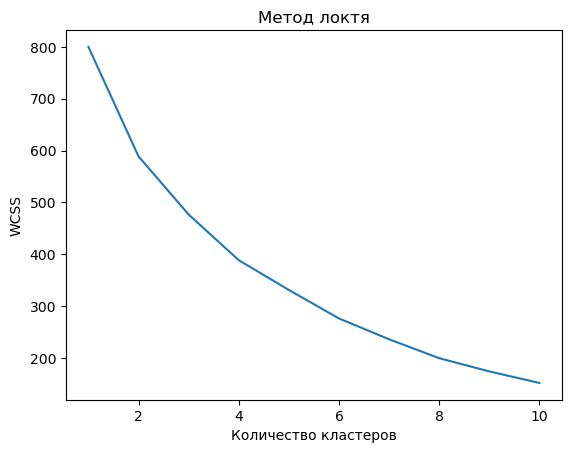

In [12]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("Метод локтя")
plt.xlabel("Количество кластеров")
plt.ylabel("WCSS")
plt.show()

## Обучаем модель кластеризации

In [13]:
# создаем экземпляр модели
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=42)
# обучаем модель на стандартизированных данных
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

Подробнее рассмотрим параметры модели:

* **n_clusters** - количество кластеров, на которые мы хотим разбить наблюдения;
* **init** – выбор первоначального расположения (инициализация) центроидов; есть два варианта, (1) выбрать центроиды случайно init = 'random' или (2) выбрать их так, чтобы центроиды с самого начала располагались максимально далеко друг от друга init = 'k-means++'; второй вариант оптимальнее;
* **n_init** – сколько раз алгоритм будет инициализирован, т.е. сколько раз будут выбраны центроиды до начала оптимизации; на выходе будет выбран тот вариант, где ошибка была минимальна;
* **max_ite**r – максимальное количество итераций алгоритма после первоначального выбора центроидов;
* **random_state** – воспроизводимость результата.

## Предсказываем кластеры и визуализируем результаты

In [14]:
# предсказываем кластеры для каждого
clusters = kmeans.predict(X)

In [15]:
# Добавляем метки кластеров в исходные данные
df["cluster"] = clusters
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,0,19,15,39,2
1,0,21,15,81,2
2,1,20,16,6,3
3,1,23,16,77,3
4,1,31,17,40,3


## Визуализация результатов

Используем PCA для уменьшения размерности и визуализации. PCA (Principal Component Analysis) - это метод снижения размерности данных, который используетя для выделения наиболее значимой информации из многомерных наборов данных.

Основная идея PCA - PCA преобразует исходные признаки в новые - главные компоненты (Principal Components), которые:

* линейно независимы (ортогональны друг другу)
* упорядочены по важности: первый компонент объясняет наибольшую дисперсию, второй - следующую по величине и т.д.

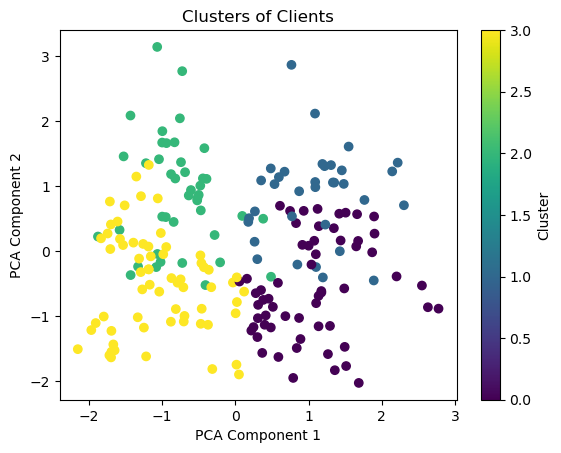

In [16]:
from sklearn.decomposition import PCA

# Уменьшаем размерность до 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Визуализация
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clusters of Clients")
plt.colorbar(label="Cluster")
plt.show()

Группируем по кластерам и анализируем средние значения в каждом кластере

In [17]:
# Группируем по кластерам
cluster_groups = df.groupby("cluster")
# Анализ средних значений в каждом кластере
cluster_groups.mean()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,,
0,0.566667,54.700000,46.900000,39.933333
1,0.411765,41.264706,88.500000,16.764706
2,0.000000,28.690476,60.904762,70.238095
3,1.000000,29.375000,58.296875,64.437500


## Визуализация по нескольким парам разных признаков с указанием центроид

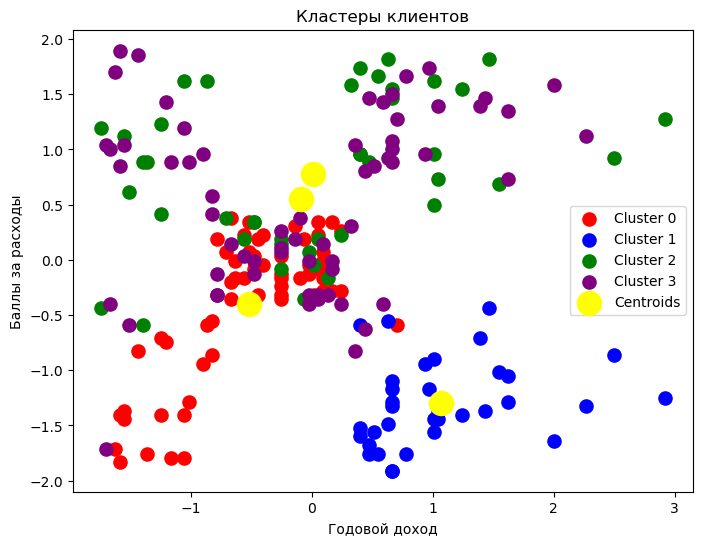

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(X[clusters == 0,2], X[clusters == 0,3], s = 90, c = 'red', label = 'Cluster 0')
plt.scatter(X[clusters == 1,2], X[clusters == 1,3], s = 90, c = 'blue', label = 'Cluster 1')
plt.scatter(X[clusters == 2,2], X[clusters == 2,3], s = 90, c = 'green', label = 'Cluster 2')
plt.scatter(X[clusters == 3,2], X[clusters == 3,3], s = 90, c = 'purple', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Кластеры клиентов')
plt.xlabel('Годовой доход')
plt.ylabel('Баллы за расходы')
plt.legend()
plt.show()

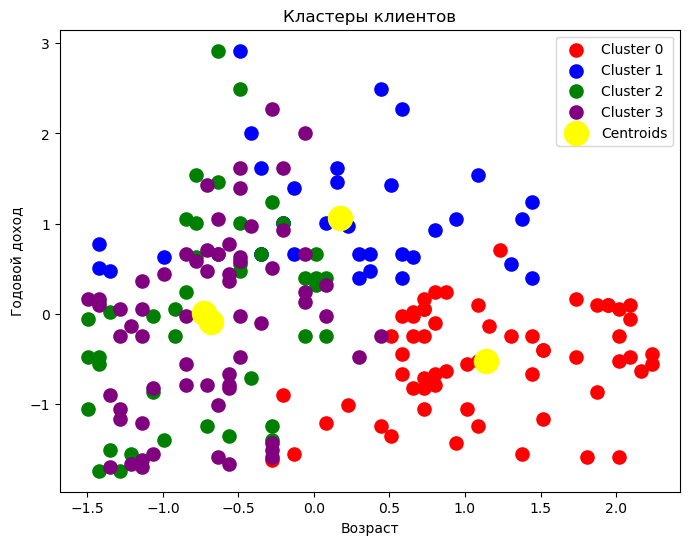

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(X[clusters == 0,1], X[clusters == 0,2], s = 90, c = 'red', label = 'Cluster 0')
plt.scatter(X[clusters == 1,1], X[clusters == 1,2], s = 90, c = 'blue', label = 'Cluster 1')
plt.scatter(X[clusters == 2,1], X[clusters == 2,2], s = 90, c = 'green', label = 'Cluster 2')
plt.scatter(X[clusters == 3,1], X[clusters == 3,2], s = 90, c = 'purple', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Кластеры клиентов')
plt.xlabel('Возраст')
plt.ylabel('Годовой доход')
plt.legend()
plt.show()

In [27]:
# Добавляем идентификаторы клиентов в исходные данные
df["CustomerID"] = y
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster,CustomerID
0,0,19,15,39,2,1
1,0,21,15,81,2,2
2,1,20,16,6,3,3
3,1,23,16,77,3,4
4,1,31,17,40,3,5


Интерпретация результатов

* Кластер 0: Клиенты с умеренной оценкой расходов.
* Кластер 1: Клиенты с низкой оценкой расходов.
* Кластер 2: Клиенты с высокой оценкой расходов.
* Кластер 3: Клиенты с оценкой расходов выше среднего.

In [28]:
# Вывод идентификаторов клиентов в каждом кластере
for cluster_num in range(4):
    print(f"\nCluster {cluster_num} clients:")
    print(df[df["cluster"] == cluster_num]["CustomerID"].values)


Cluster 0 clients:
[  7   9  11  13  15  19  23  25  27  29  31  33  35  37  39  41  43  45
  47  51  54  55  56  57  58  60  61  63  64  65  68  71  72  73  74  75
  80  81  83  84  86  87  90  91  93  97  99 102 103 105 107 108 109 110
 111 117 118 119 120 161]

Cluster 1 clients:
[127 129 131 135 137 139 141 145 147 149 151 153 155 157 159 163 165 167
 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]

Cluster 2 clients:
[  1   2  16  18  21  22  24  26  28  34  42  52  62  66  69  76  78  82
  92  96 100 104 114 121 124 128 130 132 138 142 146 150 152 170 172 174
 178 180 186 188 198 200]

Cluster 3 clients:
[  3   4   5   6   8  10  12  14  17  20  30  32  36  38  40  44  46  48
  49  50  53  59  67  70  77  79  85  88  89  94  95  98 101 106 112 113
 115 116 122 123 125 126 133 134 136 140 143 144 148 154 156 158 160 162
 164 166 168 176 182 184 190 192 194 196]
